In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Read in the data
fund_list = pd.read_csv('data/temp/fund_list_2022-12-04.csv')

In [23]:
#add a colume for fund_list
fund_list['diff_text'] = np.nan
fund_list['year'] = fund_list['date_auth'].apply(lambda x: int(x.split('-')[0]))
for i in range(len(fund_list)):
    if type(fund_list['name_subfund'][i]) == str:
        subfund = df.iloc[i]['name_subfund'].split(' ')
        prod = df.iloc[i]['name_prod'].split(' ')
        diff = ' '.join([x for x in subfund if x not in prod])
        fund_list['diff_text'][i] = diff

C:\Users\Yan Jin\AppData\Local\Temp\ipykernel_11460\2384297093.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_list['diff_text'][i] = diff


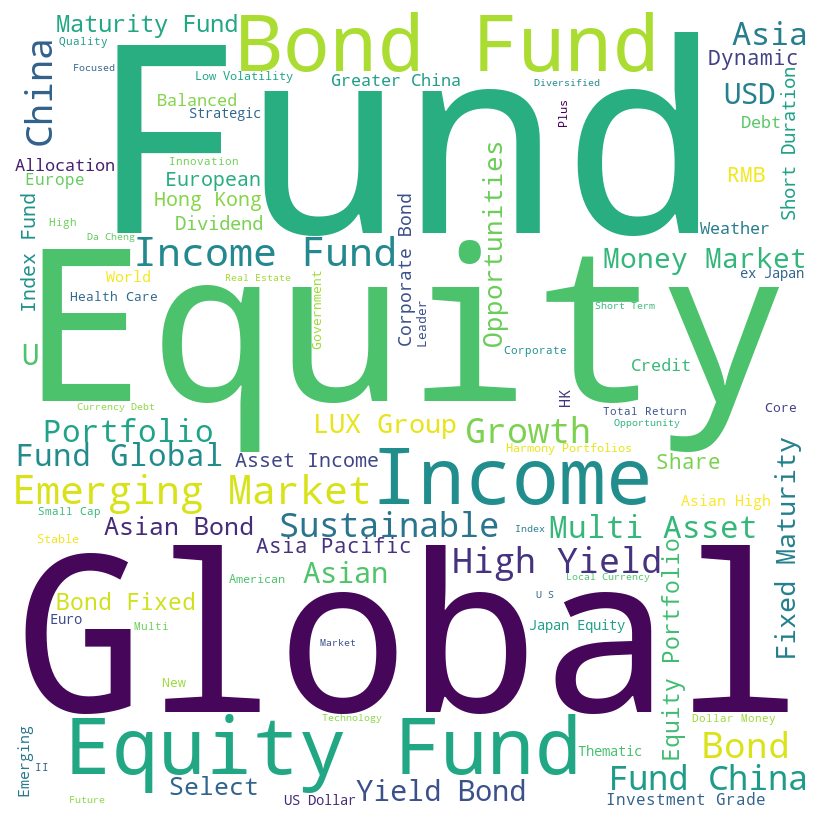

In [27]:
# set time window
df = fund_list[fund_list['year'] >2012]
text = ' '.join(df['diff_text'].dropna().values)

# generate wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
